In [106]:
library(ggplot2)
#install.packages("reshape", repos="https://cloud.r-project.org/")
library(reshape)
#install.packages("tm", repos="https://cloud.r-project.org/")
library(tm)
#install.packages("wordcloud", repos="https://cloud.r-project.org/")
library(wordcloud)

In [6]:
data=read.csv("ENC_PERC.csv", fileEncoding = "UTF-8")
data=data[2:ncol(data)]
#print(summary(data))

Warning message:
In scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : entrada inválida encontrada en la conexión de entrada 'ENC_PERC.csv'Warning message:
In scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : EOF within quoted string

In [89]:
vartype=c("categ","categ","categ","categ","categ","categ","categ","categ","text","categ",
         "text","categ","text","text","text","categ","text","text","text","categ",
         "text","categ","text","text","text","text")
pregs=c("1. Vinculación ","2. Jornada académica de mayor frecuencia","3. ¿Se siente seguro en el entorno cercano a las sedes de la universidad?","4. ¿Ha sido víctima de robo en los alrededores de la universidad?","5. ¿Conoce casos de hurto a compañeros o conocidos en el sector donde se ubican las sedes de la universidad?","6. Si respondió de manera afirmativa al pregunta anterior, ¿Cuáles fueron los hurtos más frecuentes?","7. ¿Cómo califica el espacio público en el entorno universitario?","8. ¿Considera que los espacios para caminar o transitar en el sector donde se ubican las sedes de la universidad son suficientes?","9. Justifique su respuesta ","10. ¿Considera que la presencia de establecimientos de comercio es favorable para la universidad? ","11. Elija una o varias opciones según su consideración. ¿Con cuáles de las siguientes palabras asocia los establecimientos de comercio ubicados alrededor de las sedes de la universidad:  ","12. ¿Considera que los establecimientos comerciales (restaurantes, peluquerías, papelerías, insumos agrícolas, etc)  alrededor de las sedes de la universidad son: ","13. En su opinión, ¿Cuál es el efecto que producen los establecimientos comerciales en la comunidad residente cerca a las sedes de la universidad? ","14. ¿Qué efecto tienen los establecimientos comerciales en la universidad? ","15. Marque una o varias opciones de respuesta según su criterio. Considera que la presencia de variados establecimientos comerciales en el sector donde se ubican las sedes de la universidad afectan: ","16. ¿Considera que la presencia de vendedores informales (ambulantes) afecta la convivencia de la institución con el entorno? ","17. Justifique su respuesta ","18. Marque una o varias opciones de respuesta según su criterio. Considera que los vendedores ambulantes alrededor de las sedes de la universidad afectan ","19. ¿Cómo califica la relación de la Institución con los vecinos del sector? ","20. ¿Conoce actividades o proyectos para relacionarse con vecinos o comerciantes del sector, realizadas por la universidad? ","21. En caso de haber respondido de manera afirmativa la pregunta anterior, mencione ¿Cuáles actividades o proyectos conoce?","22. ¿Conoce los mecanismos utilizados por la universidad para solucionar conflictos con la comunidad del entorno?","23. Mencione 3 palabras que describan la relación de la universidad con los residentes del sector donde se ubican sus sedes.","24. Mencione 3 palabras que definan la relación de la universidad con los comerciantes y vendedores ambulantes del sector.","25. Marque una o varias opciones de respuesta según su criterio. Considera que para mejorar las relaciones de la universidad con el entorno se debería: ","26. ¿Qué estrategia propone desde su rol, para mejorar las relaciones de la universidad con el entorno?")
data.frame(vartype,pregs)

,vartype,pregs
1,categ,1. Vinculación
2,categ,2. Jornada académica de mayor frecuencia
3,categ,3. ¿Se siente seguro en el entorno cercano a las sedes de la universidad?
4,categ,4. ¿Ha sido víctima de robo en los alrededores de la universidad?
5,categ,5. ¿Conoce casos de hurto a compañeros o conocidos en el sector donde se ubican las sedes de la universidad?
6,categ,"6. Si respondió de manera afirmativa al pregunta anterior, ¿Cuáles fueron los hurtos más frecuentes?"
7,categ,7. ¿Cómo califica el espacio público en el entorno universitario?
8,categ,8. ¿Considera que los espacios para caminar o transitar en el sector donde se ubican las sedes de la universidad son suficientes?
9,text,9. Justifique su respuesta
10,categ,10. ¿Considera que la presencia de establecimientos de comercio es favorable para la universidad?


In [90]:
cross_plot=function(cross_1,cross_2){
    func_dat=prop.table(table(data[c(cross_1,cross_2)]))
    print(chisq.test(table(data[c(cross_1,cross_2)])))
    if (chisq.test(table(data[c(cross_1,cross_2)]))$p.value<0.05) {
        print("Posiblemente esten relacionadas (no independientes)")
    } else {
        print("Posiblemente no esten relacionadas (independientes)")
    }
    t_1=melt(func_dat)#, id=c("id","time"))
    print(func_dat)
    ggplot(data = t_1 , aes_string(x =names(t_1)[1],y =names(t_1)[2]))+
    geom_tile(aes(fill = value))
}


In [35]:
cruces=data.frame(c(4,5),c(3,7),c(8,7),c(10,16),c(11,15),c(16,18),c(20,22))
length(cruces)

[1] 7


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[c(cross_1, cross_2)])
X-squared = 5.3201, df = 1, p-value = 0.02108

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                  X5...Conoce.casos.de.hurto.a.compañeros.o.conocidos.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.
X4...Ha.sido.víctima.de.robo.en.los.alrededores.de.la.universidad.          NO
                                                                NO 0.308943089
                                                                SI 0.008130081
                                                                  X5...Conoce.casos.de.hurto.a.compañeros.o.conocidos.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.
X4...Ha.sido.víctima.de.robo.en.los.alrededores.de.la.universidad.          SI
                                                                NO 0.544715447
                                            

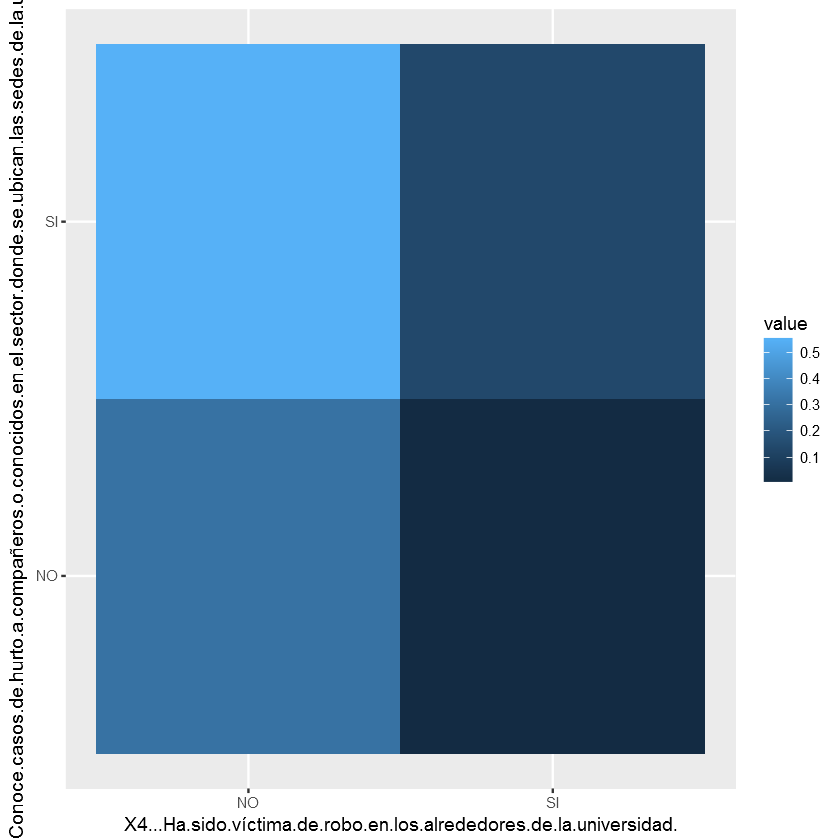

In [34]:
cross_plot(cruces[1,1],cruces[2,1])

Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  table(data[c(cross_1, cross_2)])
X-squared = 31.836, df = 4, p-value = 2.067e-06



Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                          X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X3...Se.siente.seguro.en.el.entorno.cercano.a.las.sedes.de.la.universidad.       BUENO
                                                                        NO 0.040650407
                                                                        SI 0.406504065
                                                                          X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X3...Se.siente.seguro.en.el.entorno.cercano.a.las.sedes.de.la.universidad. Inseguridad en el sector basuras al rededor de la universidad
                                                                        NO                                                   0.000000000
                                                                        SI                                                   

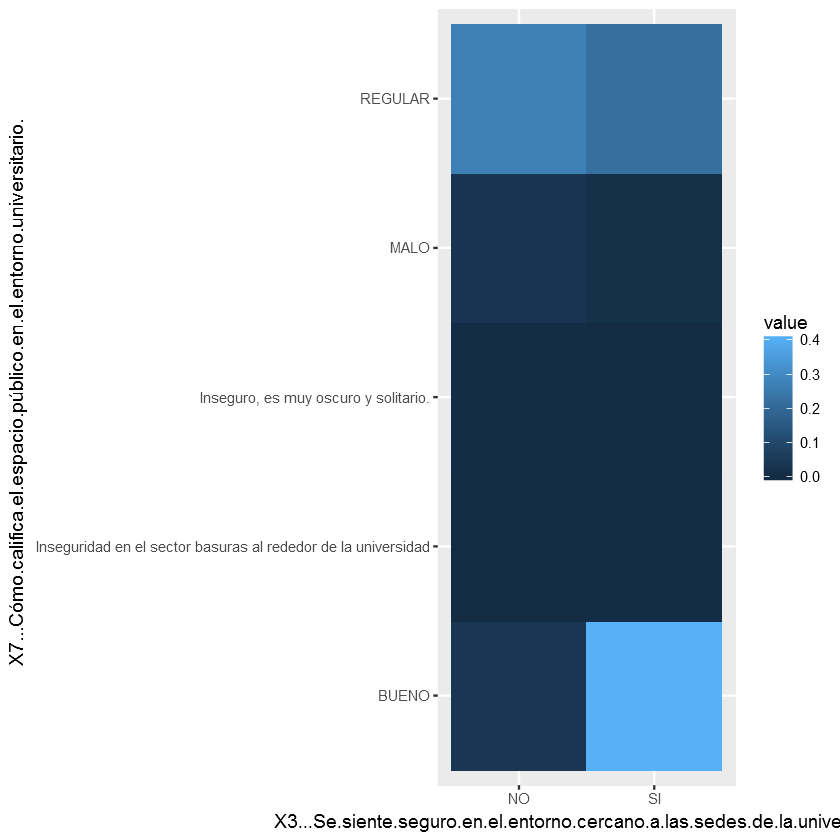

In [36]:
cross_plot(cruces[1,2],cruces[2,2])

Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  table(data[c(cross_1, cross_2)])
X-squared = 25.302, df = 4, p-value = 4.375e-05



Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                                                                                  X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X8...Considera.que.los.espacios.para.caminar.o.transitar.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.son.suficientes.       BUENO
                                                                                                                                NO 0.138211382
                                                                                                                                SI 0.308943089
                                                                                                                                  X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X8...Considera.que.los.espacios.para.caminar.o.transitar.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.son.s

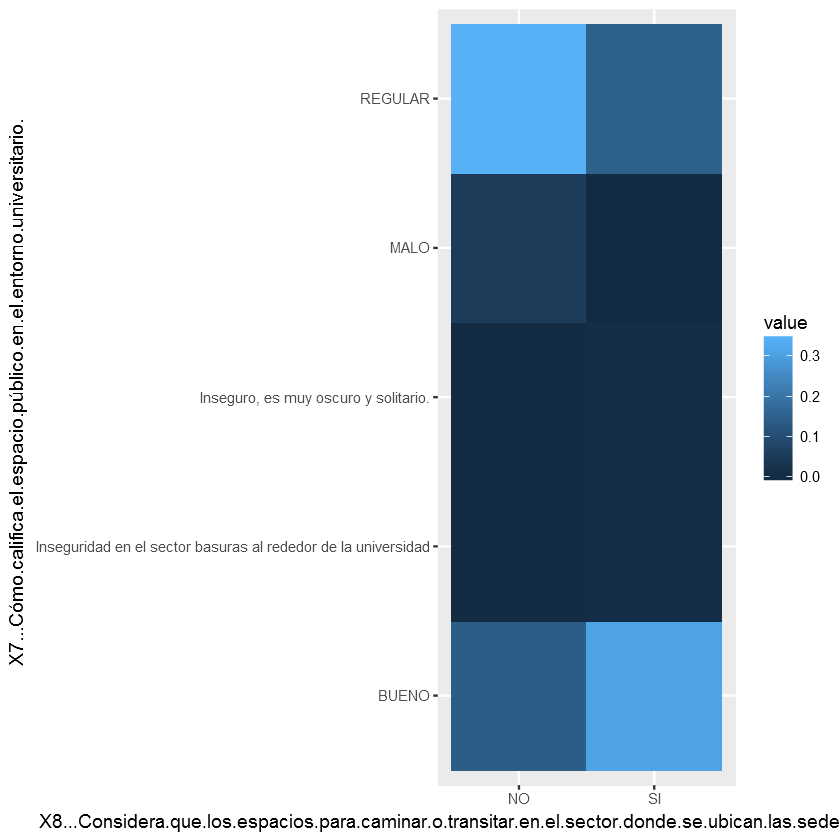

In [37]:
cross_plot(cruces[1,3],cruces[2,3])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[c(cross_1, cross_2)])
X-squared = 8.6244, df = 1, p-value = 0.003317

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                                                   X16...Considera.que.la.presencia.de.vendedores.informales..ambulantes..afecta.la.convivencia.de.la.institución.con.el.entorno..
X10...Considera.que.la.presencia.de.establecimientos.de.comercio.es.favorable.para.la.universidad..         NO
                                                                                                 NO 0.01626016
                                                                                                 SI 0.42276423
                                                                                                   X16...Considera.que.la.presencia.de.vendedores.informales..ambulantes..afecta.la.convivencia.de.la.institución.con.el.entorno..
X10

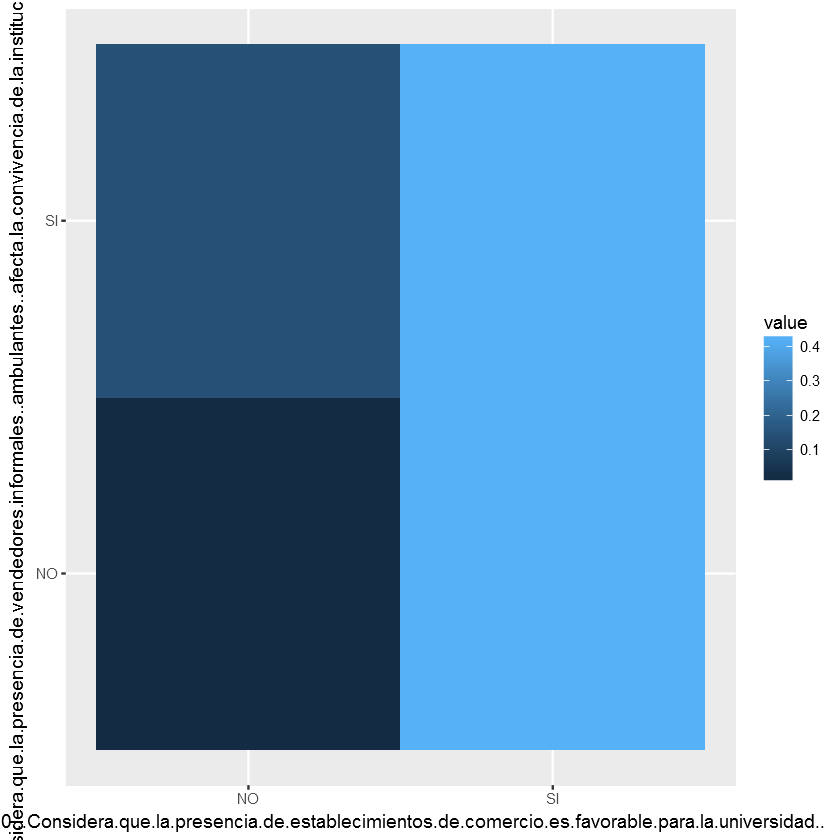

In [38]:
cross_plot(cruces[1,4],cruces[2,4])

Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  table(data[c(cross_1, cross_2)])
X-squared = 126.24, df = 4, p-value < 2.2e-16



Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                                                                             X22...Conoce.los.mecanismos.utilizados.por.la.universidad.para.solucionar.conflictos.con.la.comunidad.del.entorno.
X20...Conoce.actividades.o.proyectos.para.relacionarse.con.vecinos.o.comerciantes.del.sector..realizadas.por.la.universidad..            
                                                                                                                              0.008130081
                                                                                                                           NO 0.000000000
                                                                                                                           SI 0.000000000
                                                                                                                             X22...Conoce.los.mecanism

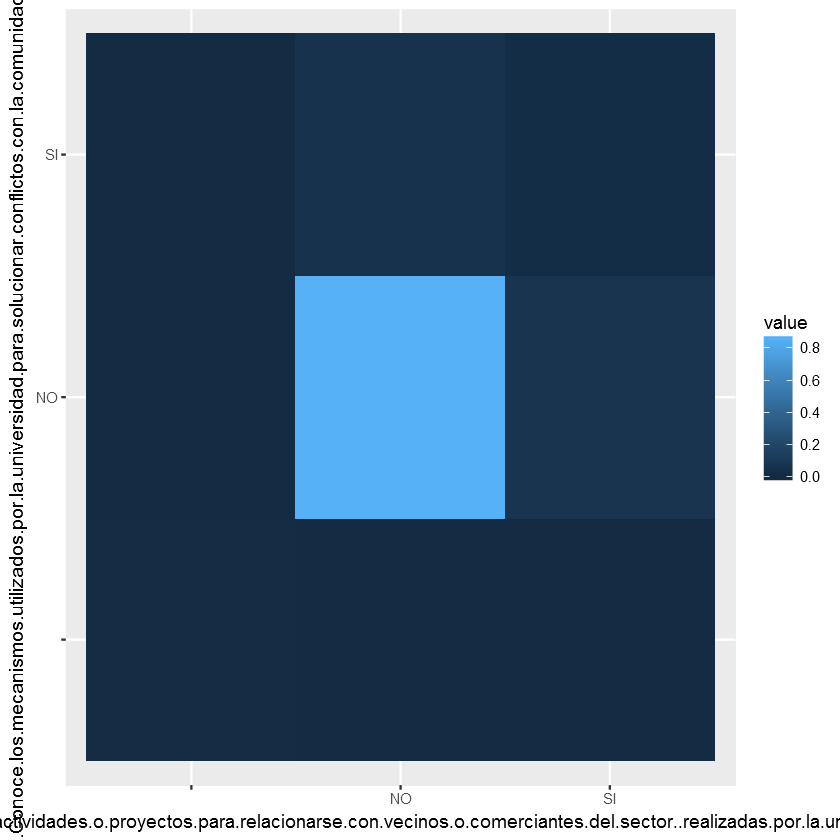

In [41]:
cross_plot(cruces[1,7],cruces[2,7])

In [95]:
summary(data[8])

 X8...Considera.que.los.espacios.para.caminar.o.transitar.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.son.suficientes.
 NO:65                                                                                                                             
 SI:58                                                                                                                             

In [96]:
#(data[9])
preg_n=9
docs= Corpus(VectorSource(data[preg_n]))

In [99]:
(docs)

[1] "1"

In [107]:
#Generate Term-Document-Matrix
#Convert Text to Corpus and Clean
cleanCorpus <- function(corpus) {
  corpus.tmp <- tm_map(corpus, removePunctuation)
  corpus.tmp <- tm_map(corpus.tmp, stripWhitespace)
  corpus.tmp <- tm_map(corpus.tmp, tolower)
  corpus.tmp <- tm_map(corpus.tmp, removeWords, stopwords("spanish"))
  return(corpus.tmp)
}

generateTDM <- function(preg_n) {
  cor.tmp <- Corpus(VectorSource(data[preg_n]))
  cor.cl <- cleanCorpus(cor.tmp)
  tdm.tmp <- TermDocumentMatrix(cor.cl)
  tdm.s <- removeSparseTerms(tdm.tmp, 0.7)
}

tdm <- generateTDM(preg_n)
tdm.m <- as.matrix(tdm)

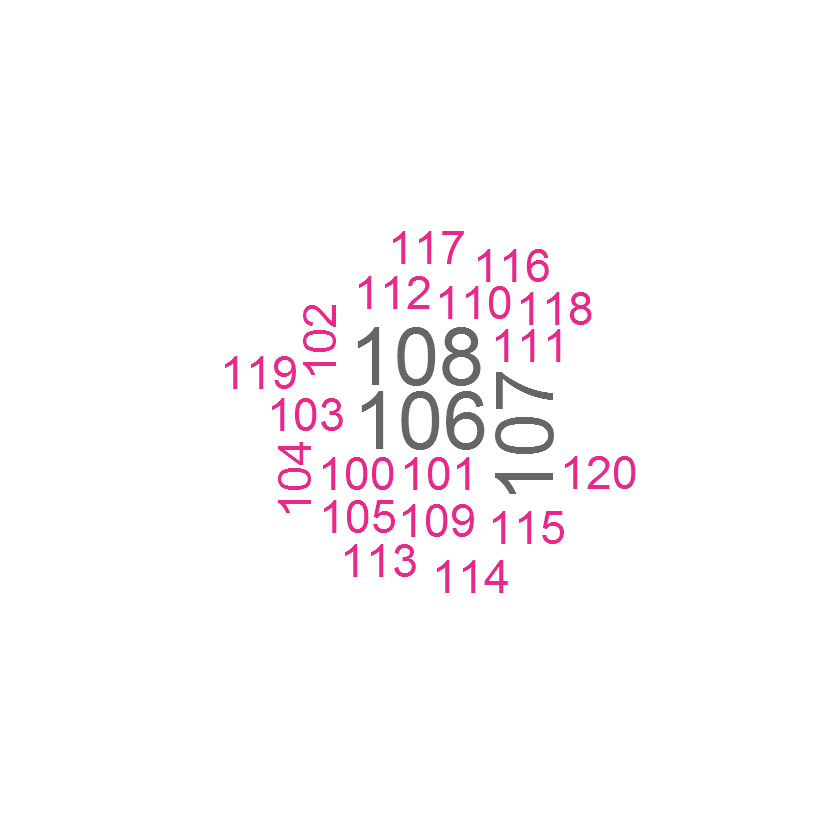

In [108]:
# conteo de palabras en orden decreciente
wf <- sort(rowSums(tdm.m),decreasing=TRUE)
 
# crea un data frame con las palabras y sus frecuencias
dm <- data.frame(word = names(wf), freq=wf)

# grafica la nube de palabras (wordcloud)
wordcloud(dm$word, dm$freq, random.order=FALSE, colors=brewer.pal(8, "Dark2"))



In [120]:
Corpus(VectorSource(data[preg_n]))

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

In [118]:
tdm$dimnames

$Terms
 [1] "100" "101" "102" "103" "104" "105" "106" "107" "108" "109" "110" "111"
[13] "112" "113" "114" "115" "116" "117" "118" "119" "120"

$Docs
[1] "1"